# 1.基本标注

使用text()会将文本放置在轴域的任意位置。文本的常见用例是标注绘图的某些特征，而annotate()方法
提供辅助函数，使标注变的容易。标注中，有两个要考略的点：由参数xy表示的标注位置和xytext的文本位置
。这两个参数都是(x,y)元组

(-2, 2)

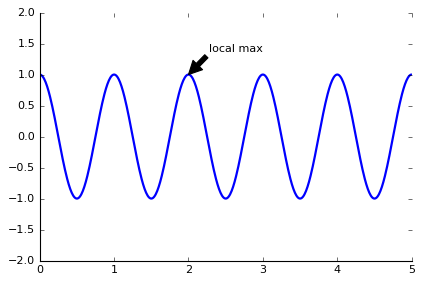

In [20]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# fig = plt.figure(figsize=(10, 10), dpi=80)
fig = plt.figure()
ax = fig.add_subplot(111)

# 移除上边和右边的轴
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

x = np.arange(0.0, 5.0, 0.01)
y = np.cos(2 * np.pi * x)

ax.plot(x, y, lw=2)

ax.annotate('local max',
            xy=(2, 1),
            xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=4),
            horizontalalignment='right',
            verticalalignment='top',
            fontsize=10)

# 设置y轴的刻度范围
ax.set_ylim(-2, 2)

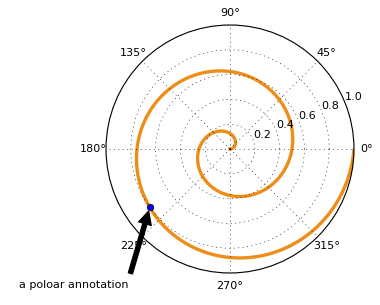

In [34]:
fig = plt.figure()

# 极坐标
ax = fig.add_subplot(111,polar = True)

r = np.arange(0,1,0.001)

theta = 2*2*np.pi*r
line,=ax.plot(theta,r,color='#ee8d18',lw=3)

ind = 800
thisr,thistheta = r[ind],theta[ind]

ax.plot([thistheta],[thisr],'o')

ax.annotate('a poloar annotation',
           xy=(thistheta,thisr),
           xytext=(0.05,0.05),
           textcoords='figure fraction',# 'figure fraction' 0,0 是圆形左下角，1,1是右上角
           arrowprops=dict(facecolor='black',shrink=0.05),
           horizontalalignment='left',
           verticalalignment='bottom')

# 2.高级标注

# 2.1使用框和文本来标注

以文本坐标(-2,-2)<br\>
ha="center"  在水平方向上，方框的中心在为（-2，0）<br\>
va="center"  在垂直方向上，方框的中心在为（0，-2）<br\>
size = '20' 代表方框的大小<br\>
bbox={}  代表对方框的设置<br\>
{ <br\>
    boxstyle= '' 代表边框的类型<br\>
            round 圆形方框<br\>
            rarrow箭头<br\>
    fc  背景颜色   英文首字母 w -whiite r-red<br\>
    ec 边框线的透明度  数字或颜色的首字母<br\>
    alpha 字体的透明度<br\>
    lw 线的粗细<br\>
    rotation  角度<br\>
}<br\>

(-4, 4)

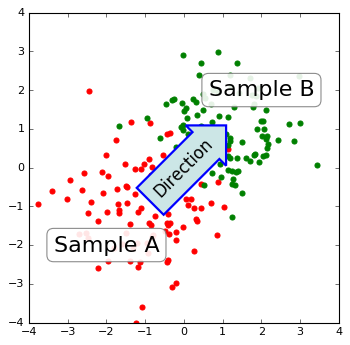

In [3]:
import numpy.random
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(5, 5))
# Clear the current figure.
fig.clf()

ax = fig.add_subplot(111)

# 设置轴缩放的方面，即y单位与x单位的比例。
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)

x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

ax.scatter(x1, y1, color='r')
ax.scatter(x2, y2, color='g')

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

# 绘出文本框
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20, bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20, bbox=bbox_props)

bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
t = ax.text(0,
            0,
            "Direction",
            ha="center",
            va="center",
            rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow",pad=0.6)

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

In [43]:
fig.clf?
ax.set_aspect?

在pyplot模块(或Axes类的text方法)中text()函数接受bbox关键字参数，并且在提供时，在文本周围绘制一个框<br\>
与文本相关联的补丁对象可以通过以下方式访问：<br\>
> bb = t.get_bbox_path() <br\>
返回值是FancyBboxPathch的一个实例，并且补丁属性(如facecolor，edgewidth等)可以像平时一样访问和修改<br \>
为了更改框的形状，使用set_boxstyle方法.<br\>


In [4]:
bb.set_boxstyle?

In [58]:
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt

# 返回边框的集合
styles = mpatch.BoxStyle.get_styles()
# print(styles)
spacing = 1.2

figheight = (spacing * len(styles) + .5)
fig1 = plt.figure(1, (4 / 1.5, figheight / 1.5))
fontsize = 0.3 * 72

for i, stylename in enumerate(sorted(styles.keys())):
    # print(i, stylename)
    t = fig1.text(0.5, (spacing * (float(len(styles)) - i) - 0.5) / figheight,
              stylename,
              ha="center",
              size=fontsize,
              transform=fig1.transFigure,
              bbox=dict(boxstyle=stylename, fc="w", ec="k"))
    
#     bb = t.get_bbox_patch()
#     bb.set_boxstyle("rarrow",pad=0.6)
    fig1.show()

/root/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


# 2.2 使用箭头来标注

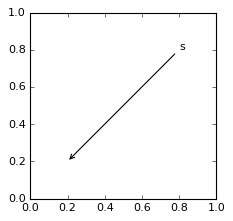

In [55]:
# 连接两个点（xy和xytext）的箭头可以通过指定arrowprops参数可选地绘制。
# 为了仅绘制箭头，请使用空字符串作为第一个参数。
import matplotlib.pyplot as plt
plt.figure(1, figsize=(3, 3))
ax = plt.subplot(111)

# arrowprops = {
#     arrowstyle 箭头类型
#     connectionstyle：xy与xytext连接之间类型
ax.annotate(
    "s",
    xy=(0.2, 0.2),
    xycoords='data',
    xytext=(0.8, 0.8),
    textcoords='data',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
)
plt.show()

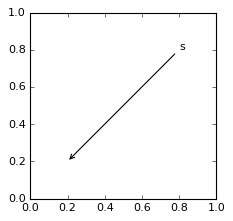